In [80]:
import chipwhisperer as cw

In [81]:
%%bash
cd ../hardware/victims/firmware/simpleserial-aes/
make PLATFORM=CWLITEXMEGA CRYPTO_TARGET=TINYAES128C

Building for platform CWLITEXMEGA with CRYPTO_TARGET=TINYAES128C
SS_VER set to SS_VER_1_1
Blank crypto options, building for AES128
rm -f -- simpleserial-aes-CWLITEXMEGA.hex
rm -f -- simpleserial-aes-CWLITEXMEGA.eep
rm -f -- simpleserial-aes-CWLITEXMEGA.cof
rm -f -- simpleserial-aes-CWLITEXMEGA.elf
rm -f -- simpleserial-aes-CWLITEXMEGA.map
rm -f -- simpleserial-aes-CWLITEXMEGA.sym
rm -f -- simpleserial-aes-CWLITEXMEGA.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-aes.s simpleserial.s XMEGA_AES_driver.s uart.s usart_driver.s xmega_hal.s aes.s aes-independant.s
rm -f -- simpleserial-aes.d simpleserial.d XMEGA_AES_driver.d uart.d usart_driver.d xmega_hal.d aes.d aes-independant.d
rm -f -- simpleserial-aes.i simpleserial.i XMEGA_AES_driver.i uart.i usart_driver.i xmega_hal.i aes.i aes-independant.i
.
Welcome to another exciting ChipWhisperer target build!!
avr-gcc (GCC) 10.1.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for 

.././simpleserial/simpleserial.c:18: warning: "CRC" redefined
   18 | #define CRC 0xA6
      | 
In file included from c:\users\gc_lu\chipwh~1\cw\home\portable\avrgcc\avr-gcc-10.1.0-x64-windows\avr\include\avr\io.h:552,
                 from .././hal/hal.h:93,
                 from .././simpleserial/simpleserial.c:5:
c:\users\gc_lu\chipwh~1\cw\home\portable\avrgcc\avr-gcc-10.1.0-x64-windows\avr\include\avr\iox128d3.h:2239: note: this is the location of the previous definition
 2239 | #define CRC    (*(CRC_t *) 0x00D0)  /* Cyclic Redundancy Checker */
      | 


In [52]:
%%bash
cd ../hardware/victims/firmware/simpleserial-aes-modes/
make PLATFORM=CWLITEXMEGA CRYPTO_TARGET=HWCRYPTO

SS_VER set to SS_VER_1_1
rm -f -- simpleserial-mode-CWLITEXMEGA.hex
rm -f -- simpleserial-mode-CWLITEXMEGA.eep
rm -f -- simpleserial-mode-CWLITEXMEGA.cof
rm -f -- simpleserial-mode-CWLITEXMEGA.elf
rm -f -- simpleserial-mode-CWLITEXMEGA.map
rm -f -- simpleserial-mode-CWLITEXMEGA.sym
rm -f -- simpleserial-mode-CWLITEXMEGA.lss
rm -f -- objdir/*.o
rm -f -- objdir/*.lst
rm -f -- simpleserial-aes.s simpleserial.s XMEGA_AES_driver.s uart.s usart_driver.s xmega_hal.s aes.s aes-independant.s
rm -f -- simpleserial-aes.d simpleserial.d XMEGA_AES_driver.d uart.d usart_driver.d xmega_hal.d aes.d aes-independant.d
rm -f -- simpleserial-aes.i simpleserial.i XMEGA_AES_driver.i uart.i usart_driver.i xmega_hal.i aes.i aes-independant.i
.
Welcome to another exciting ChipWhisperer target build!!
avr-gcc (GCC) 10.1.0
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR 

simpleserial-aes.c: In function 'main':
simpleserial-aes.c:131:31: warning: passing argument 3 of 'simpleserial_addcmd' from incompatible pointer type [-Wincompatible-pointer-types]
  131 |  simpleserial_addcmd('k', 16, update_key);
      |                               ^~~~~~~~~~
      |                               |
      |                               void (*)(uint8_t *, uint8_t) {aka void (*)(unsigned char *, unsigned char)}
In file included from simpleserial-aes.c:24:
.././simpleserial/simpleserial.h:43:61: note: expected 'uint8_t (*)(uint8_t *, uint8_t)' {aka 'unsigned char (*)(unsigned char *, unsigned char)'} but argument is of type 'void (*)(uint8_t *, uint8_t)' {aka 'void (*)(unsigned char *, unsigned char)'}
   43 | int simpleserial_addcmd(char c, unsigned int len, uint8_t (*fp)(uint8_t*, uint8_t));
      |                                                   ~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~
simpleserial-aes.c:132:34: warning: passing argument 3 of 'simpleserial_addcmd' from

In [82]:
scope = cw.scope()
scope.default_setup()

In [83]:
cw.program_target(scope, cw.programmers.XMEGAProgrammer, "../hardware/victims/firmware/simpleserial-aes/simpleserial-aes-CWLITEXMEGA.hex")

XMEGA Programming flash...
XMEGA Reading flash...
Verified flash OK, 4179 bytes


In [84]:
target = cw.target(scope)

In [85]:
proj_path = "../projects/CPA_project_test"

In [86]:
proj = cw.create_project(proj_path)

In [78]:
proj = cw.open_project(proj_path)

In [72]:
N_traces = 30
ktp = cw.ktp.VarVec()
# ktp.fixed_key=False
# ktp.fixed_text=True
key, text = ktp.next()
zero_array = bytearray([0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00])
one_array =  bytearray([0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff,0xff])
# key = zero_array
print(key)




CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')


In [73]:
key = zero_array

In [64]:
for i in range(30):
#     key, text = ktp.next()
    print(key)
    print(text)
#     trace = cw.capture_trace(scope, target, text, key)
#     if trace is None:
#         print('fail')
#         continue
#     proj.traces.append(trace)
#     key=one_array
    key, text = ktp.next()

proj.save()

CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'a7 8d e6 e8 00 00 00 00 00 00 00 00 00 00 00 00')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'9a 1d 2e 9c 00 00 00 00 00 00 00 00 00 00 00 00')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'd6 49 db 92 00 00 00 00 00 00 00 00 00 00 00 00')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'6a 21 c3 a6 00 00 00 00 00 00 00 00 00 00 00 00')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'81 b1 e0 c2 00 00 00 00 00 00 00 00 00 00 00 00')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'39 e5 60 78 00 00 00 00 00 00 00 00 00 00 00 00')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'ca 84 0e 3c 00 00 00 00 00 00 00 00 00 00 00 00')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'99 b8 21 94 00 00 00 00 00

In [88]:
N_traces = 3000
ktp = cw.ktp.Basic()
# ktp.init(50) # init with the number of traces you plan to
#                      # capture
key, text = ktp.next()

for i in range(50):
    key, text = ktp.next()
    print(key)
    print(text)
    trace = cw.capture_trace(scope, target, text, key)
    if trace is None:
        continue
    proj.traces.append(trace)
    
proj.save()

CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'0f 2b d6 5e 2c dd 93 d6 11 8c e0 5b a7 93 44 81')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'e2 9f d0 82 10 9e 61 0b ea 0b 27 0f 90 d8 68 dc')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'd2 11 cc 86 71 c7 31 27 06 45 a9 0e de be 01 cd')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'd9 28 4d fe 3b b8 03 91 0e 51 5d 0b ca 2a 94 d2')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'e3 5c 09 5e b0 a3 75 2b 62 ce 42 e8 b8 1d 95 b1')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'14 13 a5 6e aa 9d d4 2e ad 7b dd 09 7b c9 64 e4')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'1a 35 48 1f 37 8c 13 2a fd 5a a3 82 cb 16 cb 55')
CWbytearray(b'2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c')
CWbytearray(b'6c 2f 6c 0e 91 c3 45 b5 5d

In [8]:
import chipwhisperer.analyzer as cwa
import matplotlib.pylab as plt

proj = cw.open_project(proj_path)

In [9]:
attack = cwa.cpa(proj, cwa.leakage_models.sbox_output)
results = attack.run()
print(results)

Subkey KGuess Correlation
  00    0x2B    0.75337
  01    0x7E    0.78653
  02    0x15    0.77427
  03    0x16    0.79474
  04    0x28    0.78058
  05    0xAE    0.90769
  06    0xD2    0.78220
  07    0xA6    0.79535
  08    0xAB    0.77417
  09    0xF7    0.91606
  10    0x15    0.91350
  11    0x88    0.90952
  12    0x09    0.77712
  13    0xCF    0.79903
  14    0x4F    0.79265
  15    0x3C    0.91049



<IPython.core.display.Javascript object>


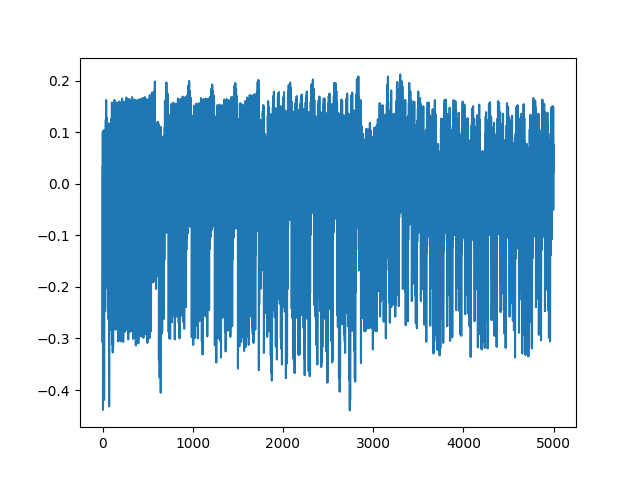

In [89]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.plot(proj.waves[21])

In [15]:
%matplotlib notebook
import matplotlib.pylab as plt

print(len(proj.traces))
print(proj.traces[0].textin)
print(proj.traces[0].textout)
print(proj.traces[0].key)
for key in proj.keys:
    print(key)
# plt.plot(proj.traces[0].wave)
# plt.plot(proj.traces[1].wave, 'r')


3000
[ 17 239  58 231 194 121  26 218  38  89 177 156 252 236 224 100]
[196  76  17 173 215  34 223 136 191 179  91 221 204 135 199 226]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 

[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  

[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
[ 43 126  

In [79]:
from chipwhisperer.analyzer import aes_funcs
import pandas as pd

key = proj.traces[0].key
int_round_key=[]
round_key=[]


for i in range(11):
    temp = aes_funcs.key_schedule_rounds(key, 11, i)
    int_round_key.append(temp)
    round_temp=[]
    for j in temp:
        round_temp.append(hex(j))
    round_key.append(round_temp)
    
# print(round_key)
# print(int_round_key)

print(key)
key1 = pd.DataFrame(round_key)
key1

[ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0x45,0xfd,0xd6,0x26,0xf6,0xa7,0xf4,0xa9,0xa,0xa,0xe6,0x3a,0x94,0x54,0x3e,0x2c
1,0x64,0x4f,0xa7,0x4,0x92,0xe8,0x53,0xad,0x98,0xe2,0xb5,0x97,0xc,0xb6,0x8b,0xbb
2,0x28,0x72,0x4d,0xfa,0xba,0x9a,0x1e,0x57,0x22,0x78,0xab,0xc0,0x2e,0xce,0x20,0x7b
3,0xa7,0xc5,0x6c,0xcb,0x1d,0x5f,0x72,0x9c,0x3f,0x27,0xd9,0x5c,0x11,0xe9,0xf9,0x27
4,0xb1,0x5c,0xa0,0x49,0xac,0x3,0xd2,0xd5,0x93,0x24,0xb,0x89,0x82,0xcd,0xf2,0xae
5,0x1c,0xd5,0x44,0x5a,0xb0,0xd6,0x96,0x8f,0x23,0xf2,0x9d,0x6,0xa1,0x3f,0x6f,0xa8
6,0x49,0x7d,0x86,0x68,0xf9,0xab,0x10,0xe7,0xda,0x59,0x8d,0xe1,0x7b,0x66,0xe2,0x49
7,0x3a,0xe5,0xbd,0x49,0xc3,0x4e,0xad,0xae,0x19,0x17,0x20,0x4f,0x62,0x71,0xc2,0x6
8,0x19,0xc0,0xd2,0xe3,0xda,0x8e,0x7f,0x4d,0xc3,0x99,0x5f,0x2,0xa1,0xe8,0x9d,0x4
9,0x99,0x9e,0x20,0xd1,0x43,0x10,0x5f,0x9c,0x80,0x89,0x0,0x9e,0x21,0x61,0x9d,0x9a


In [36]:
key2 = pd.DataFrame(int_round_key)
key2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,69,253,214,38,246,167,244,169,10,10,230,58,148,84,62,44
1,100,79,167,4,146,232,83,173,152,226,181,151,12,182,139,187
2,40,114,77,250,186,154,30,87,34,120,171,192,46,206,32,123
3,167,197,108,203,29,95,114,156,63,39,217,92,17,233,249,39
4,177,92,160,73,172,3,210,213,147,36,11,137,130,205,242,174
5,28,213,68,90,176,214,150,143,35,242,157,6,161,63,111,168
6,73,125,134,104,249,171,16,231,218,89,141,225,123,102,226,73
7,58,229,189,73,195,78,173,174,25,23,32,79,98,113,194,6
8,25,192,210,227,218,142,127,77,195,153,95,2,161,232,157,4
9,153,158,32,209,67,16,95,156,128,137,0,158,33,97,157,154
